In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [4]:
file_path_t = r"C:/Users/vehico/Documents/Thesis/Distance-project/OpenLayers/my-openlayers-project/public/data/aggregated_hospital_by_municipality_roma.csv"
file_path_d = r"C:/Users/vehico/Documents/Thesis/Distance-project/OpenLayers/my-openlayers-project/public/data/aggregated_hospital_by_municipality.csv"

# Caricare i dati aggregati
df = pd.read_csv(file_path_d)  # Dati Driving
df_transit = pd.read_csv(file_path_t)  # Dati Transit

In [5]:
# Unire i due dataset per comune
df_merged = df.merge(df_transit, on="Comune", suffixes=("_driving", "_transit"))
df_merged.head(5)

,Comune,Popolazione_totale_driving,mean_km_driving,mean_min_driving,St.Dv_km_driving,St.Dv_min_driving,Popolazione_totale_transit,mean_km_transit,mean_min_transit,St.Dv_km_transit,St.Dv_min_transit
0,AFFILE,1325.0,12.485212,18.966289,1.766353,3.358757,1345.0,9.244046,22.322354,2.869487,20.739183
1,AGOSTA,1588.0,9.550750,12.410139,1.173804,1.393238,1588.0,8.970139,31.540218,1.222472,5.508804
2,ALBANO LAZIALE,38363.0,3.653845,8.573359,1.738901,2.775409,38363.0,7.565008,37.466931,4.713613,19.281836
3,ALLUMIERE,3642.0,14.286590,19.075027,1.137028,2.250957,3642.0,14.324633,30.743273,1.360473,0.659966
4,ANGUILLARA SABAZIA,17530.0,11.491442,14.712800,2.480936,3.738652,17530.0,22.456710,62.476787,5.948168,38.204203


In [6]:
df_merged[f"Hospital_diff_km"] = df_merged[f"mean_km_transit"] - df_merged[f"mean_km_driving"]
df_merged[f"Hospital_diff_min"] = df_merged[f"mean_min_transit"] - df_merged[f"mean_min_driving"]

In [7]:
# Salvare il dataset con le differenze
df_merged.to_csv("differenze_municipio_Hospitals.csv", index=False)

In [14]:
df_merged[['Hospital_diff_km', 'Hospital_diff_min']].describe()

,Hospital_diff_km,Hospital_diff_min
count,108.000000,108.000000
mean,7.325691,46.071280
std,12.044857,38.668025
min,-3.793734,2.600001
25%,0.367000,15.984182
50%,1.652995,32.400516
75%,9.596989,70.436498
max,54.833571,157.581766


The data shows that public transit is significantly more time- and distance-intensive than driving when accessing hospitals, with a mean penalty of over 7 km and 46 minutes. However, the strong skewness and presence of outliers suggest that the accessibility gap varies considerably across municipalities. While some areas are marginally affected, others face dramatic disadvantages, underlining the need for localized transit improvements.

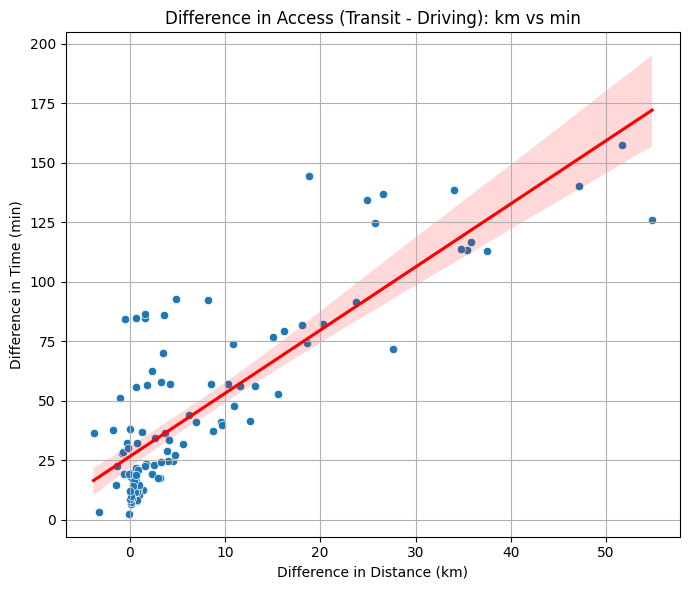

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_merged,
    x='Hospital_diff_km',
    y='Hospital_diff_min'
)
sns.regplot(
    data=df_merged,
    x='Hospital_diff_km',
    y='Hospital_diff_min',
    scatter=False,
    color='red'
)
plt.title('Difference in Access (Transit - Driving): km vs min')
plt.xlabel('Difference in Distance (km)')
plt.ylabel('Difference in Time (min)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
corr, pval = pearsonr(df_merged['Hospital_diff_km'], df_merged['Hospital_diff_min'])
print(f"🔗 Pearson correlation: r = {corr:.3f}, p-value = {pval:.2e}")

🔗 Pearson correlation: r = 0.826, p-value = 3.60e-28


The analysis reveals a strong positive correlation (r=0.826r=0.826, p<0.001p<0.001) between the additional distance and additional time required to access hospitals by public transit compared to driving. This confirms that spatial barriers are a major driver of temporal accessibility penalties. However, the correlation is not perfect, suggesting that in some municipalities, increased travel time cannot be fully explained by distance alone — indicating possible inefficiencies in transit services, such as poor frequency, indirect routing, or long transfer times.

In [20]:
df_merged['efficiency_gap'] = df_merged['Hospital_diff_min'] / (df_merged['Hospital_diff_km'] + 1e-3)  # avoid division by 0
df_merged.sort_values(by='efficiency_gap', ascending=False).head(10)

,Comune,Popolazione_totale_driving,mean_km_driving,mean_min_driving,St.Dv_km_driving,St.Dv_min_driving,Popolazione_totale_transit,mean_km_transit,mean_min_transit,St.Dv_km_transit,St.Dv_min_transit,Hospital_diff_km,Hospital_diff_min,std_diff,efficiency_gap
81,ROCCA DI PAPA,17111.0,0.768849,2.927465,5.855182,6.353724,17115.0,0.777015,11.902170,7.008760,26.180920,0.008166,8.974705,NaN,979.151684
67,NEMI,1757.0,3.094691,6.391064,1.162102,2.757893,1776.0,3.152814,44.640719,1.599093,18.740801,0.058123,38.249655,NaN,646.947890
3,ALLUMIERE,3642.0,14.286590,19.075027,1.137028,2.250957,3642.0,14.324633,30.743273,1.360473,0.659966,0.038043,11.668245,NaN,298.857547
105,VICOVARO,3381.0,14.283293,15.659144,3.436532,2.427199,3392.0,14.328114,28.028302,3.896526,7.576083,0.044820,12.369158,NaN,269.948742
34,FIANO ROMANO,13944.0,61.996000,54.783333,NaN,NaN,13944.0,62.683000,139.583333,NaN,NaN,0.687000,84.800000,NaN,123.255814
45,GROTTAFERRATA,19997.0,1.577079,4.445312,1.052909,2.252706,20012.0,1.734016,22.505472,9.074816,16.225032,0.156937,18.060160,NaN,114.350638
18,CARPINETO ROMANO,3866.0,19.196000,22.700000,NaN,NaN,3866.0,19.285000,31.216667,NaN,NaN,0.089000,8.516667,NaN,94.629630
30,CINETO ROMANO,566.0,23.205560,24.717815,0.605991,1.873833,566.0,23.858433,80.460306,3.172788,2.168461,0.652873,55.742491,NaN,85.249749
29,CICILIANO,1113.0,14.434748,17.608176,0.790545,0.353553,1113.0,14.674421,37.179350,0.738927,10.830519,0.239673,19.571174,NaN,81.318543
97,SEGNI,7301.0,5.117908,7.927690,1.914268,2.023905,7301.0,5.274534,18.167441,2.167126,11.316397,0.156626,10.239750,NaN,64.962116


In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Assumiamo che il DataFrame si chiami `df` e contenga le colonne 'Hospital_diff_km' e 'Hospital_diff_min'
# Puoi cambiarlo se usi un nome diverso (es. df_diff)

# Selezioniamo le colonne rilevanti
X = df_merged[['Hospital_diff_km']].values  # Feature (differenza di km)
y = df_merged['Hospital_diff_min'].values   # Target (differenza di minuti)

# Fit regressione lineare
model = LinearRegression()
model.fit(X, y)

# Predizione e residui
df_merged['Predicted_min'] = model.predict(X)
df_merged['Residual'] = df_merged['Hospital_diff_min'] - df_merged['Predicted_min']

# Classifica dei 10 peggiori outlier (residuo più alto = tempo maggiore del previsto)
top_residuals = df_merged.sort_values(by='Residual', ascending=False).head(10)

# Mostriamo risultati
print("🔍 Top 10 comuni con maggiore inefficienza temporale rispetto alla distanza:")
display(top_residuals[['Comune', 'Hospital_diff_km', 'Hospital_diff_min', 'Predicted_min', 'Residual']])


🔍 Top 10 comuni con maggiore inefficienza temporale rispetto alla distanza:


,Comune,Hospital_diff_km,Hospital_diff_min,Predicted_min,Residual
17,CAPRANICA PRENESTINA,18.802162,144.449816,76.510348,67.939468
31,CIVITELLA SAN PAOLO,-0.495015,84.453647,25.328407,59.125241
34,FIANO ROMANO,0.687000,84.800000,28.463467,56.336533
100,TORRITA TIBERINA,1.571491,86.371271,30.809405,55.561866
66,NAZZANO,1.616492,84.794132,30.928760,53.865372
16,CAPENA,4.813276,92.812199,39.407596,53.404603
23,CASTELNUOVO DI PORTO,3.598959,86.182306,36.186861,49.995445
12,CAMERATA NUOVA,8.251985,92.555709,48.528092,44.027618
94,SANT'ORESTE,24.914197,134.446135,92.721311,41.724824
75,PONZANO ROMANO,26.557000,136.700000,97.078522,39.621478


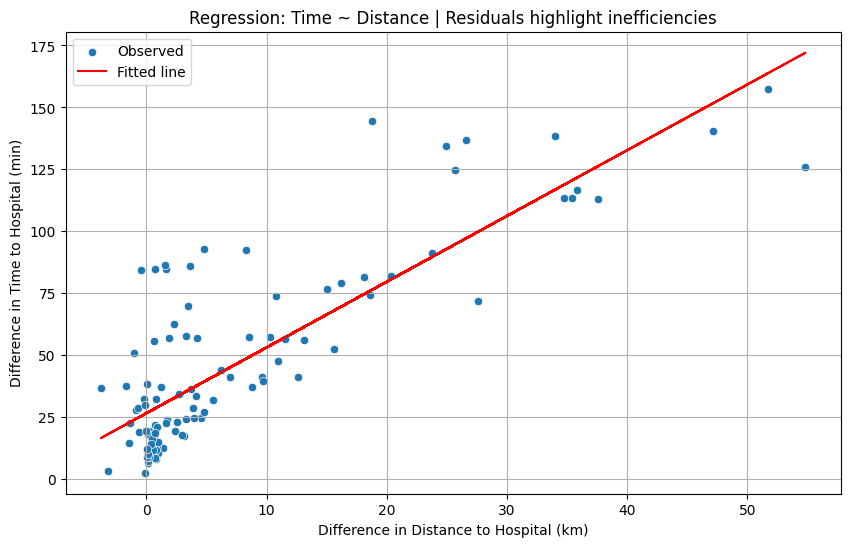

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Hospital_diff_km', y='Hospital_diff_min', label='Observed')
plt.plot(df_merged['Hospital_diff_km'], df_merged['Predicted_min'], color='red', label='Fitted line')
plt.xlabel('Difference in Distance to Hospital (km)')
plt.ylabel('Difference in Time to Hospital (min)')
plt.title('Regression: Time ~ Distance | Residuals highlight inefficiencies')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Calcolare statistiche per le differenze
stats = df_merged[
    ["Hospital_diff_min"]
].describe().T

stats

,count,mean,std,min,25%,50%,75%,max
Hospital_diff_min,108.0,46.07128,38.668025,2.600001,15.984182,32.400516,70.436498,157.581766


In [10]:
# Aggiungere l'Intervallo Interquartile (IQR)
stats["IQR"] = stats["75%"] - stats["25%"]

stats

,count,mean,std,min,25%,50%,75%,max,IQR
Hospital_diff_min,108.0,46.07128,38.668025,2.600001,15.984182,32.400516,70.436498,157.581766,54.452316


In [13]:
# Consideriamo le colonne relative alla differenza di tempo (minuti) tra transit e driving
diff_columns = ["Hospital_diff_min"]

# Calcolare la deviazione standard per ogni comune
df_merged["std_diff"] = df_merged["Hospital_diff_min"].std(axis=1)

ValueError: No axis named 1 for object type Series

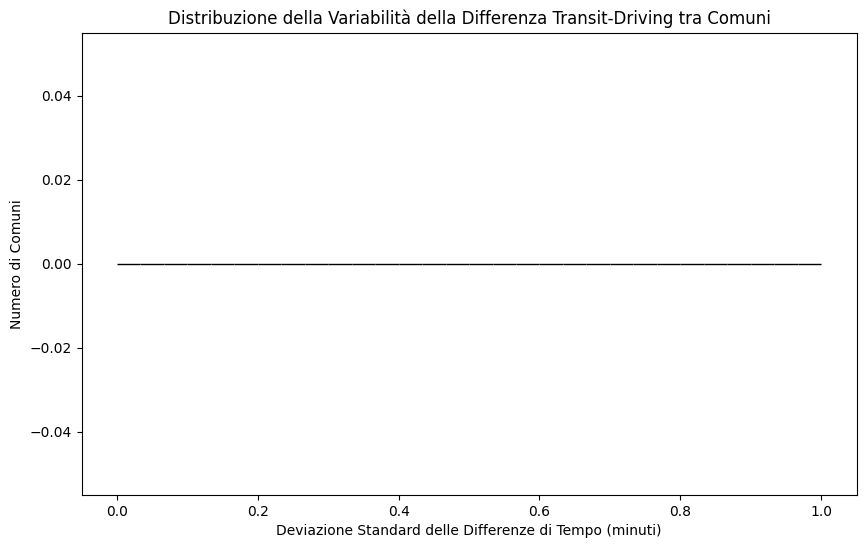

In [12]:
# Istogramma della deviazione standard tra i comuni
plt.figure(figsize=(10, 6))
sns.histplot(df_merged["std_diff"], bins=30, kde=True)
plt.xlabel("Deviazione Standard delle Differenze di Tempo (minuti)")
plt.ylabel("Numero di Comuni")
plt.title("Distribuzione della Variabilità della Differenza Transit-Driving tra Comuni")
plt.show()